<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
        <img src="../figs/uoc_masterbrand_3linies_positiu.png", align="left">
    </div>
    <div style="float: right; width: 50%;">
        <p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
        <p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
        <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
    </div>
</div>
<div style="width:100%;">&nbsp;</div>

# Ejemplo de agrupamiento jerárquico sencillo

El objetivo de este ejemplo sencillo es entender el funcionamiento del agrupamiento jerárquico.


### Carga de las librerías

In [1]:
import numpy as np

Tenemos una colección de puntos a los que representamos como un array de `numpy`. 

In [2]:
LM_points = np.array([[2,2], [2,4], [4,4], [6,6], [7,8], [2,9], [8,5], [7,2], [8,7], [5,1],])

Ahora vamos a visualizar dichos puntos. 

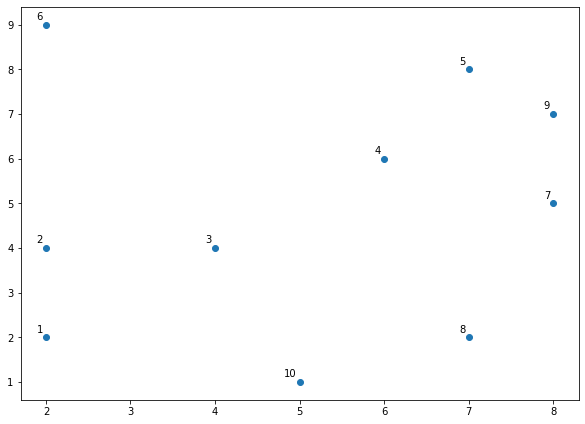

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(LM_points[:,0],LM_points[:,1], label='True Position')

for label, x, y in zip(labels, LM_points[:, 0], LM_points[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

Estos son los puntos representados: 
- Punto 1 o A: [2,2]
- Punto 2 o B: [2,4]
- Punto 3 o C: [4,4]
- Punto 4 o D: [6,6]
- Punto 5 o E: [7,8]
- Punto 6 o F: [2,9]
- Punto 7 o G: [8,5]
- Punto 8 o H: [7,2]
- Punto 9 o I: [8,7]
- Punto 10 o J: [5,1]

En este gráfico aún no vemos muy bien qué posibles clústeres se podrían formar. Para ello vamos a crear el dendograma que corresponde a estos puntos, empleando la librería `scipy`. 

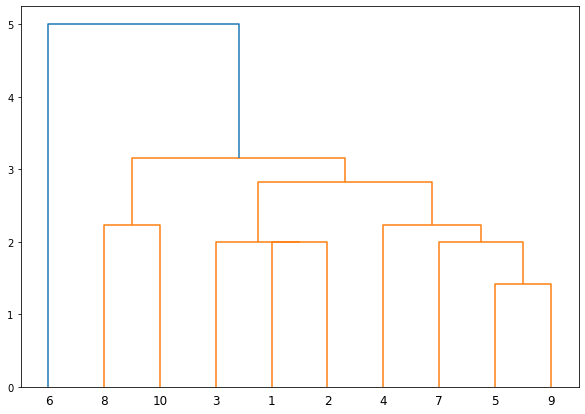

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(LM_points, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

El algoritmo empieza encontrando los dos puntos que están más cerca uno de otro, en este caso de acuerdo con la distancia euclídea. Como vemos en el primer gráfico, los puntos más cercanos son el 5 y el 9, en este caso el I y el E. El primer clúster sería, por tanto, el IE. De esta forma, basándonos en el dendograma, veríamos que en la siguiente iteración del algoritmo se crean dos clústeres. Al clúster IE se le uniría el punto 7, es decir el punto G, de modo que tendríamos en la segunda iteración el clúster IEG y, por otra parte, el clúster 3,1,2, es decir, el clúster CBA. Así, iríamos subiendo por el dendograma. 

Al final tendríamos dos clústeres (uno formado por todos los puntos menos el 6) y otro formado por un solo punto, el 6. 